In [6]:
!py -m pip install --index-url https://test.pypi.org/simple/ aibro

Looking in indexes: https://test.pypi.org/simple/
     ---------------------------------------- 51.5/51.5 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Looking in indexes: https://test.pypi.org/simple/
  ERROR: Could not find a version that satisfies the requirement setuptools>=42 (from versions: none)
  ERROR: No matching distribution found for setuptools>=42
  
  [notice] A new release of pip available: 22.2.2 -> 23.1.2
  [notice] To update, run: C:\Users\sathw\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

pip subprocess to install build dependencies did not run successfully.
exit code: 1

See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: C:\Users\sathw\AppData\Loc

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import PIL.Image
# import tensorflow_datasets as tfds

In [12]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 0


In [13]:
train_data = tf.keras.utils.image_dataset_from_directory("E:\Major Project data\extracted_images",
                                                    validation_split=0.2,
                                                        subset="training",
                                                        seed=123,
                                                         image_size=(45,45),
                                                        batch_size=1)

Found 124949 files belonging to 48 classes.
Using 99960 files for training.


In [14]:
val_ds = tf.keras.utils.image_dataset_from_directory("E:\Major Project data\extracted_images",
                                                    validation_split=0.2,
                                                        subset="validation",
                                                        seed=123,
                                                         image_size=(45,45),
                                                        batch_size=1)

Found 124949 files belonging to 48 classes.
Using 24989 files for validation.


In [15]:
for image,label in train_data:
    print(image.shape)
    print(label.shape)
    break

(1, 45, 45, 3)
(1,)


In [24]:
class_labels=train_data.class_names
class_labels

['(',
 ')',
 '+',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '=',
 'A',
 'C',
 'G',
 'H',
 'M',
 'N',
 'R',
 'S',
 'T',
 'X',
 '[',
 ']',
 'b',
 'd',
 'div',
 'e',
 'f',
 'forward_slash',
 'i',
 'j',
 'k',
 'l',
 'o',
 'p',
 'q',
 'times',
 'u',
 'v',
 'w',
 'y',
 'z',
 '{',
 '}']

In [18]:
model = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255),
                            tf.keras.layers.Conv2D(32,3,activation="relu"),
                            tf.keras.layers.MaxPooling2D(),
                            tf.keras.layers.Conv2D(32,3,activation="relu"),
                            tf.keras.layers.MaxPooling2D(),
                            tf.keras.layers.Conv2D(32,3,activation="relu"),
                            tf.keras.layers.MaxPooling2D(),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128,activation="relu"),
                            tf.keras.layers.Dense(48)])

In [19]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [21]:
history=model.fit(train_data,validation_data=val_ds,epochs=2)

Epoch 1/2
99960/99960 [==============================] - 756s 8ms/step - loss: 0.4718 - accuracy: 0.8528 - val_loss: 0.4474 - val_accuracy: 0.8589
Epoch 2/2
99960/99960 [==============================] - 806s 8ms/step - loss: 0.4697 - accuracy: 0.8543 - val_loss: 0.4709 - val_accuracy: 0.8596


In [22]:
model.save("only_math")

INFO:tensorflow:Assets written to: only_math\assets


INFO:tensorflow:Assets written to: only_math\assets


In [10]:
print(history.history)

{'loss': [0.8632891178131104, 0.5992899537086487, 0.574959933757782, 0.5590111613273621, 0.5603182911872864, 0.5836524367332458, 0.6729069948196411, 0.6263519525527954, 0.6880442500114441, 0.6680127382278442, 0.6734139323234558, 0.6899654865264893, 0.7021214365959167, 0.7101423740386963, 0.7289065718650818, 0.7491186261177063, 0.7627524733543396, 0.7822592258453369, 0.789360761642456, 0.8109023571014404], 'accuracy': [0.7538833618164062, 0.8210181593894958, 0.8265131711959839, 0.832937479019165, 0.8331882953643799, 0.8289324045181274, 0.8086857795715332, 0.8212763071060181, 0.8073728680610657, 0.8131776452064514, 0.8123294115066528, 0.807999849319458, 0.8057354688644409, 0.8029252290725708, 0.7998569011688232, 0.7948413491249084, 0.7926802039146423, 0.7869344353675842, 0.7849798798561096, 0.7805764675140381], 'val_loss': [0.6475828289985657, 0.593517005443573, 0.5805737376213074, 0.5529656410217285, 0.5742906928062439, 0.547885000705719, 0.6544933915138245, 0.6503047943115234, 0.716457

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


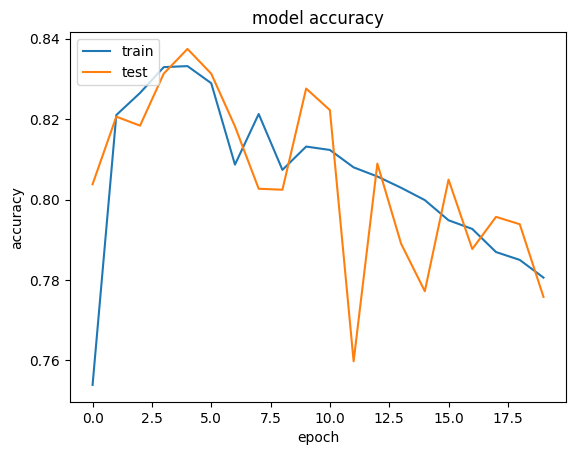

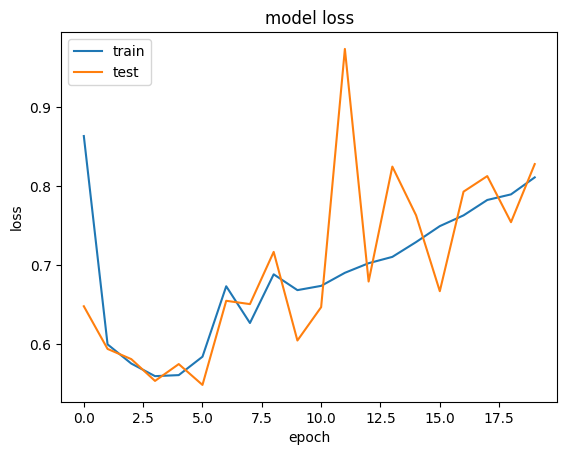

In [11]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
model.save("model_epoch_20")

INFO:tensorflow:Assets written to: model_epoch_20\assets


INFO:tensorflow:Assets written to: model_epoch_20\assets


In [7]:
model=tf.keras.models.load_model("C:\\Users\sathw\Documents\Image segmentation\model_epoch_5")

In [10]:
loss,accuracy=model.evaluate(val_ds,batch_size=1)

33894/33894 [==============================] - 69s 2ms/step - loss: 0.6679 - accuracy: 0.8138


In [11]:
loss

0.66792231798172

In [12]:
accuracy

0.8138313293457031